In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [4]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [6]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,Little Women,14
...,...,...
4828,Yesterday,1
4829,Ten Gentlemen from West Point,1
4830,New Americans,1
4831,Return to Oz,1


In [7]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,The Lord of the Rings: The Return of the King,11
2,Ben-Hur,11
3,West Side Story,10
4,The Last Emperor,9


In [8]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,Little Women,14,3.0
...,...,...,...
4828,Yesterday,1,0.0
4829,Ten Gentlemen from West Point,1,0.0
4830,New Americans,1,0.0
4831,Return to Oz,1,0.0


In [9]:
#Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [10]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [11]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [12]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [13]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [14]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [15]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [16]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
16222,Toy Story 3,2010,all,8.3,98%,0,0,0,1,0,Lee Unkrich,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,5.0,2.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,4.0,0.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0
3563,Good Will Hunting,1997,18+,8.3,97%,0,1,0,0,0,Gus Van Sant,"Drama,Romance",United States,English,126.0,9.0,2.0,1.0


In [17]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")


In [18]:
combined_df2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,Unknown,6.2,Unknown,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,Unknown,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,Unknown,5.7,Unknown,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,Unknown,6.6,Unknown,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [19]:
#TOTAL: Count of number or movies per genre
genre_count = {}
for Genres in combined_df2["Genres"].values:

    genres_list = Genres.split(",")
    
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
    
#genre_count

genre_name = genre_count.keys() 
count_genre = genre_count.values() 
# print("Genres : ", str(genre_name)) 
# print("Count : ", str(count_genre))


allgenres_df=pd.DataFrame(count_genre, index=genre_name)
allgenres_df.head(5)

,0
Action,2683
Adventure,1778
Sci-Fi,1228
Thriller,3354
Comedy,4637


In [20]:
#NETFLIX: Count of number or movies per genre

netflix_genre_data= combined_df2[["Title", "Netflix", "Genres", "Wins"]].drop_duplicates()
netflix_genre_data2=netflix_genre_data.loc[netflix_genre_data["Netflix"]==1]
netflix_genre_data2.head()

,Title,Netflix,Genres,Wins
0,Inception,1,"Action,Adventure,Sci-Fi,Thriller",4.0
1,The Matrix,1,"Action,Sci-Fi",4.0
2,Avengers: Infinity War,1,"Action,Adventure,Sci-Fi",0.0
3,Back to the Future,1,"Adventure,Comedy,Sci-Fi",1.0
4,"The Good, the Bad and the Ugly",1,Western,0.0


In [21]:
net_genre_count = {}

for Genres in netflix_genre_data2["Genres"].values:

    net_genres_list = Genres.split(",")
    
    for genre in net_genres_list:
        genre = genre.strip()
        if genre not in net_genre_count:
            net_genre_count[genre]=0
        net_genre_count[genre] +=1
    
# net_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
net_genre_name = net_genre_count.keys() 
net_genre_count = net_genre_count.values() 

#Creating DataFrame for the top 10 genres
netflix_genre_df=pd.DataFrame(net_genre_count, index=net_genre_name)
netflix_genre_df= netflix_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_netflix_genres= netflix_genre_df[0:10]
top_netflix_genres


,Genre,Genre Count
0,Drama,1501
1,Comedy,1308
2,Thriller,652
3,Romance,551
4,Action,545
5,Documentary,511
6,Crime,372
7,Adventure,318
8,Family,315
9,Horror,266


<AxesSubplot:xlabel='Genre'>

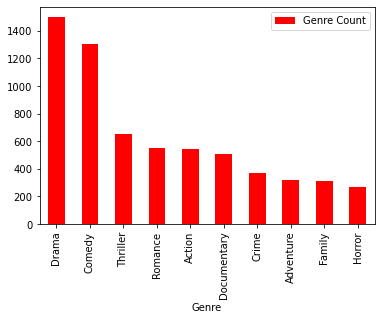

In [22]:
#NETFLIX GENRES: Bar Graph

top_netflix_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='r')

In [23]:
#HULU: Count of number or movies per genre

hulu_genre_data= combined_df2[["Title", "Hulu", "Genres", "Wins"]].drop_duplicates()
hulu_genre_data2=hulu_genre_data.loc[hulu_genre_data["Hulu"]==1]
hulu_genre_data2.head()

,Title,Hulu,Genres,Wins
67,Blackfish,1,"Documentary,News",0.0
97,Jiro Dreams of Sushi,1,Documentary,0.0
146,The Patriot,1,"Action,Drama,History,War",1.0
148,The Square,1,"Comedy,Drama",0.0
214,Hitch,1,"Comedy,Romance",0.0


In [24]:
hulu_genre_count = {}

for Genres in hulu_genre_data2["Genres"].values:

    hulu_genres_list = Genres.split(",")
    
    for genre in hulu_genres_list:
        genre = genre.strip()
        if genre not in hulu_genre_count:
            hulu_genre_count[genre]=0
        hulu_genre_count[genre] +=1
    
# hulu_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
hulu_genre_name = hulu_genre_count.keys() 
hulu_genre_count = hulu_genre_count.values() 

#Creating DataFrame for the top 10 genres
hulu_genre_df=pd.DataFrame(hulu_genre_count, index=hulu_genre_name)
hulu_genre_df= hulu_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_hulu_genres= hulu_genre_df[0:10]
top_hulu_genres


,Genre,Genre Count
0,Drama,438
1,Comedy,272
2,Thriller,221
3,Romance,151
4,Documentary,132
5,Action,129
6,Horror,124
7,Adventure,111
8,Family,105
9,Crime,100


<AxesSubplot:xlabel='Genre'>

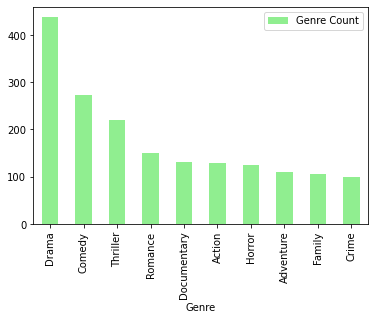

In [25]:
#HULU GENRES: Bar Graph
top_hulu_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightgreen')

In [26]:
#Prime Video: Count of number or movies per genre

prime_genre_data= combined_df2[["Title", "Prime Video", "Genres", "Wins"]].drop_duplicates()
prime_genre_data2=prime_genre_data.loc[prime_genre_data["Prime Video"]==1]
prime_genre_data2.head()

,Title,Prime Video,Genres,Wins
4,"The Good, the Bad and the Ugly",1,Western,0.0
6,The Pianist,1,"Biography,Drama,Music,War",3.0
11,3 Idiots,1,"Comedy,Drama",0.0
15,Once Upon a Time in the West,1,Western,0.0
31,Drive,1,"Crime,Drama",0.0


In [27]:
prime_genre_count = {}

for Genres in prime_genre_data2["Genres"].values:

    prime_genres_list = Genres.split(",")
    
    for genre in prime_genres_list:
        genre = genre.strip()
        if genre not in prime_genre_count:
            prime_genre_count[genre]=0
        prime_genre_count[genre] +=1
    
# prime_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
prime_genre_name = prime_genre_count.keys() 
prime_genre_count = prime_genre_count.values() 

#Creating DataFrame for the top 10 genres
prime_genre_df=pd.DataFrame(prime_genre_count, index=prime_genre_name)
prime_genre_df= prime_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_prime_genres= prime_genre_df[0:10]
top_prime_genres


,Genre,Genre Count
0,Drama,5437
1,Comedy,3004
2,Thriller,2632
3,Action,2049
4,Documentary,1895
5,Horror,1878
6,Romance,1691
7,Crime,1423
8,Adventure,1166
9,Mystery,983


<AxesSubplot:xlabel='Genre'>

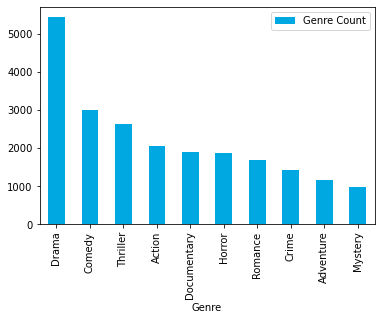

In [28]:
#PRIME VIDEO GENRES: Bar Graph
top_prime_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='#00A8E1')

In [29]:
#Prime Video: Count of number or movies per genre

disney_genre_data= combined_df2[["Title", "Disney+", "Genres", "Wins"]].drop_duplicates()
disney_genre_data2=disney_genre_data.loc[disney_genre_data["Disney+"]==1]
disney_genre_data2.head()

,Title,Disney+,Genres,Wins
95,Saving Mr. Banks,1,"Biography,Comedy,Drama",0.0
103,Amy,1,Drama,1.0
122,Bolt,1,"Animation,Adventure,Comedy,Drama,Family",0.0
125,The Princess and the Frog,1,"Animation,Adventure,Comedy,Family,Fantasy,Musi...",0.0
150,Miracle,1,"Biography,Drama,History,Sport",0.0


In [30]:
disney_genre_count = {}

for Genres in disney_genre_data2["Genres"].values:

    disney_genres_list = Genres.split(",")
    
    for genre in disney_genres_list:
        genre = genre.strip()
        if genre not in disney_genre_count:
            disney_genre_count[genre]=0
        disney_genre_count[genre] +=1
    
# disney_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
disney_genre_name = disney_genre_count.keys() 
disney_genre_count = disney_genre_count.values() 

#Creating DataFrame for the top 10 genres
disney_genre_df=pd.DataFrame(disney_genre_count, index=disney_genre_name)
disney_genre_df= disney_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_disney_genres= disney_genre_df[0:10]
top_disney_genres


,Genre,Genre Count
0,Family,430
1,Comedy,281
2,Adventure,258
3,Fantasy,176
4,Drama,162
5,Animation,146
6,Sci-Fi,88
7,Action,88
8,Musical,84
9,Romance,78


<AxesSubplot:xlabel='Genre'>

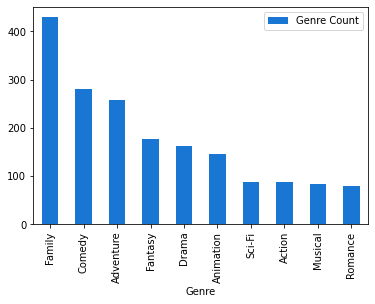

In [31]:
#DISNEY VIDEO GENRES: Bar Graph
top_disney_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='#1976d2')

In [32]:
# Dataframes of each service

netflix = combined_df.loc[combined_df["Netflix"] == 1]

hulu = combined_df.loc[combined_df["Hulu"] == 1]
hulu
primevideo = combined_df.loc[combined_df["Prime Video"] == 1]
primevideo
disney = combined_df.loc[combined_df["Disney+"] == 1]
disney.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,1.0,0.0,0.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,1.0,1.0,0.0
122,Bolt,2008,7+,6.8,89%,1,0,0,1,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,1.0,0.0,0.0
125,The Princess and the Frog,2009,all,7.1,85%,1,0,0,1,0,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0,3.0,0.0,0.0
150,Miracle,2004,7+,7.5,81%,1,0,0,1,0,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0,0.0,0.0,0.0


In [33]:
# Oscar Nominated movies dataframe
netflix_nominations = netflix.loc[netflix["Nomination"] > 0]
hulu_nominations = hulu.loc[hulu["Nomination"] > 0]
primevideo_nominations = primevideo.loc[primevideo["Nomination"] > 0]
disney_nominations = disney.loc[disney["Nomination"] > 0]

In [34]:
# Count of award nominated movies
netflix_nom_movies = netflix_nominations["Title"].count()
hulu_nom_movies = hulu_nominations["Title"].count()
primevideo_nom_movies = primevideo_nominations["Title"].count()
disney_nom_movies = disney_nominations["Title"].count()

In [35]:
# Oscar Winning movies dataframe
netflix_wins = netflix.loc[netflix["Wins"] > 0]
hulu_wins = hulu.loc[hulu["Wins"] > 0]
primevideo_wins = primevideo.loc[primevideo["Wins"] > 0]
disney_wins = disney.loc[disney["Wins"] > 0]

netflix_win_movies = netflix_wins["Title"].count()
hulu_win_movies = hulu_wins["Title"].count()
primevideo_win_movies = primevideo_wins["Title"].count()
disney_win_movies = disney_wins["Title"].count()

In [36]:
# Nominated Best Picture
netflix_bp_nom = netflix.loc[netflix["Won Best Picture"] == 1]
hulu_bp_nom = hulu.loc[hulu["Won Best Picture"] == 1]
primevideo_bp_nom = primevideo.loc[primevideo["Won Best Picture"] == 1]
disney_bp_nom = disney.loc[disney["Won Best Picture"] == 1]

netflix_bp_nom_movies = netflix_bp_nom["Title"].count()
hulu_bp_nom_movies = hulu_bp_nom["Title"].count()
primevideo_bp_nom_movies = primevideo_bp_nom["Title"].count()
disney_bp_nom_movies = disney_bp_nom["Title"].count()

In [37]:
# Won Best Picture
netflix_bp = netflix.loc[netflix["Won Best Picture"] == 2]
hulu_bp = hulu.loc[hulu["Won Best Picture"] == 2]
primevideo_bp = primevideo.loc[primevideo["Won Best Picture"] == 2]
disney_bp = disney.loc[disney["Won Best Picture"] == 2]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

netflix_bp_win

3

In [38]:
# Count of movies that have been Nominated

# List of services to be index
ss_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

# Dataframe of wins, nominations
data = {
    'Nomination': [netflix_nom_movies, hulu_nom_movies, primevideo_nom_movies, disney_nom_movies],
    'Wins': [netflix_win_movies, hulu_win_movies, primevideo_win_movies, disney_win_movies],
    'Nominated Best Picture': [netflix_bp_nom_movies, hulu_bp_nom_movies, primevideo_bp_nom_movies, disney_bp_nom_movies],
    'Won Best Picture': [netflix_bp_win, hulu_bp_win, primevideo_bp_win, disney_bp_win],
}
ss_awards = pd.DataFrame(data, index =ss_names) 
ss_awards

,Nomination,Wins,Nominated Best Picture,Won Best Picture
Netflix,166,59,29,3
Hulu,66,19,7,1
Prime Video,377,102,18,3
Disney+,107,41,6,1


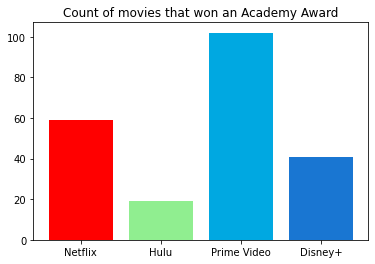

In [41]:
# Count of movies that won an Academy Award
win_plot = plt.bar(ss_names, ss_awards["Wins"], color=["red", "lightgreen", "#00A8E1", "#1976d2"])
plt.title("Count of movies that won an Academy Award")
plt.show()

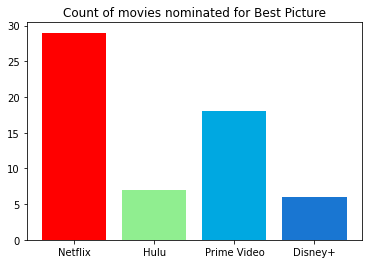

In [40]:
# Count of movies that were Nominated Best Picture
bpnom_plot = plt.bar(ss_names, ss_awards["Nominated Best Picture"], color=["red", "lightgreen", "#00A8E1", "#1976d2"])

plt.title("Count of movies nominated for Best Picture")
plt.show()

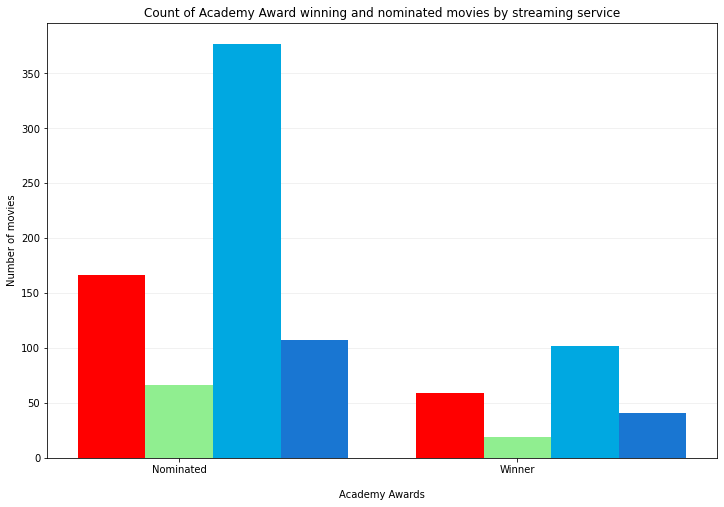

In [51]:
# Bars of award stats along x-axis
netflix_sum3 = ss_awards.iloc[0, 0:2]
hulu_sum3 = ss_awards.iloc[1, 0:2]
primevideo_sum3 = ss_awards.iloc[2, 0:2]
disney_sum3 = ss_awards.iloc[3, 0:2]

categories = ["Nomination", "Wins"]

x_axis3 = np.arange(len(categories))
bar_width = 0.2

fig, groupbars3 = plt.subplots(figsize=(12, 8))

b1 = groupbars3.bar(x_axis3, netflix_sum3, width=bar_width, label="Netflix", color="red")
b2 = groupbars3.bar(x_axis3+bar_width, hulu_sum3, width=bar_width, label="Hulu", color="lightgreen")
b3 = groupbars3.bar(x_axis3+bar_width*2, primevideo_sum3, width=bar_width, label="Prime Video", color="#00A8E1")
b4 = groupbars3.bar(x_axis3+bar_width*3, disney_sum3, width=bar_width, label="Disney+", color="#1976d2")

groupbars3.set_xticks(x_axis3 + bar_width)
groupbars3.set_xticklabels(["Nominated", "Winner"])
groupbars3.set_xlabel('Academy Awards', labelpad=15)
groupbars3.set_ylabel('Number of movies')
groupbars3.set_title('Count of Academy Award winning and nominated movies by streaming service')
groupbars3.set_axisbelow(True)
groupbars3.yaxis.grid(True, color='#EEEEEE')
plt.show()

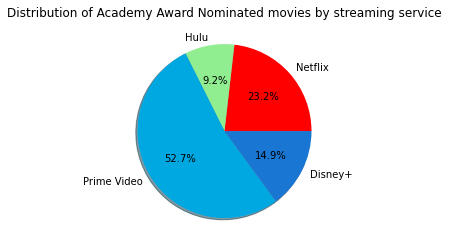

In [52]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Nomination"], labels=ss_names, colors=["red", "lightgreen", "#00A8E1", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award Nominated movies by streaming service")
plt.show()

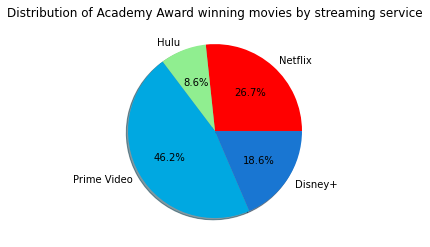

In [42]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Wins"], labels=ss_names, colors=["red", "lightgreen", "#00A8E1", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award winning movies by streaming service")
plt.show()

In [14]:
#Create new dataframe excluding null values from 'Country'
country_df = combined_df[combined_df['Country'].notnull()]

#Split genres name and count no. of movies in each genre
country_count = {}
for x in country_df["Country"].values:

    country_list = x.split(",")
    #print (country_list)
    for y in country_list:
        y = y.strip()
        #print(y)
        if y not in country_count:
            country_count[y]=0
        country_count[y] +=1
        #print(country_count)
    
#country_count

country_name = country_count.keys() 
count_country = country_count.values() 



allcountries_df=pd.DataFrame(count_country, country_name)
allcountries_df.head(5)

,0
United States,10486
United Kingdom,1713
Italy,417
Spain,329
West Germany,69


In [15]:
#Select the top 15 countries by value counts
country_top_df = allcountries_df[0:15]

country_top_df=country_top_df.reset_index().rename(columns={'index':'Country', 0:'Counts'})

country_top_df= country_top_df.sort_values('Counts',ascending = False)

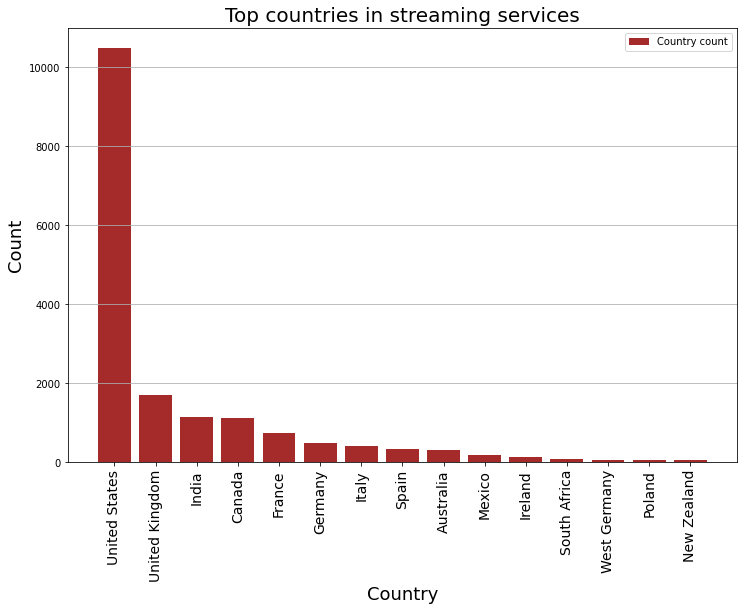

In [16]:
#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()


In [17]:
#Create new dataframe excluding null values from 'Language'
language_df = combined_df[combined_df['Language'].notnull()]

#Split genres name and count no. of movies in each genre
language_count = {}
for x in language_df["Language"].values:

    language_list = x.split(",")
    #print (language_list)
    for y in language_list:
        y = y.strip()
        #print(y)
        if y not in language_count:
            language_count[y]=0
        language_count[y] +=1
        #print(country_count)
    
#country_count

language_name = language_count.keys() 
count_language = language_count.values() 



alllanguages_df=pd.DataFrame(count_language, language_name)
alllanguages_df.head(5)

,0
English,13233
Japanese,317
French,799
Italian,440
Spanish,872


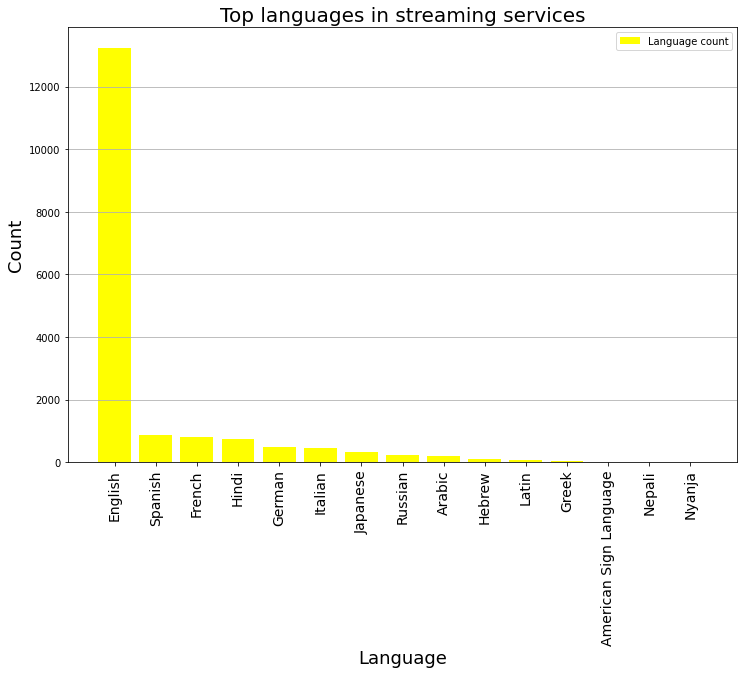

In [18]:
#Select the top 15 languages by value counts
language_top = alllanguages_df[0:15]
language_top_df=language_top.reset_index().rename(columns={'index':'Language', 0:'Counts'})
language_top_df= language_top_df.sort_values('Counts',ascending = False)

#Specify x & y values
xvalues = language_top_df['Language'].values
yvalues= language_top_df['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='yellow', alpha = 1, align="center")
plt.xticks(language_top_df['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in streaming services", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/languages.png")
plt.show()

In [19]:
# List of service names
service_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Create a dataframe for Netflix values =1
netflix_data = combined_df.copy()
netflix_data = netflix_data[combined_df['Netflix']==1]

#Create a dataframe for Prime Video values =1
prime_data = combined_df.copy()
prime_data = prime_data[combined_df['Prime Video']==1]

#Create a dataframe for Hulu values =1
hulu_data = combined_df.copy()
hulu_data = hulu_data[combined_df['Hulu']==1]

#Create a dataframe for Disney+ values =1
disney_data = combined_df.copy()
disney_data = disney_data[combined_df['Disney+']==1]

In [21]:
#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")
rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)
rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings', 'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df.head()

,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126


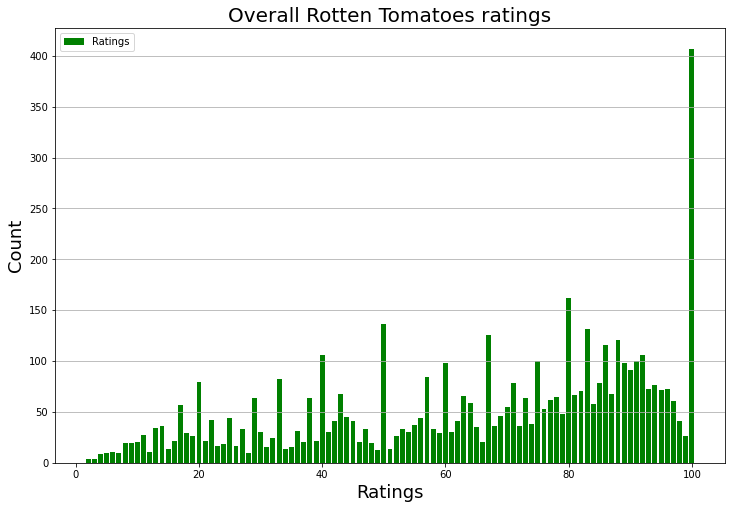

In [22]:
rot_x = rotten_tomatoes_df['Ratings'].values.astype("int")
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
ticks=(np.arange(10, 100, step=10))
# plt.xticks(ticks, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/rot_tom.png")
plt.show()
